In [1]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

# 이미지, 라벨 경로

In [20]:
#train
# image_folder = '/home/aiffel-dj10/Seoul_dataset/train/image/'
#val
image_folder = '/home/aiffel-dj10/Seoul_dataset/val/image'

In [21]:
import os

file_list = os.listdir(image_folder)
image_files = [file for file in file_list if file.endswith(".png")]

print ("file_list_py: {}".format(image_files))

file_list_py: ['LC_AP_37714039_005_1024.png', 'LC_AP_37714009_020_1024.png', 'LC_AP_37715001_002_1024.png', 'LC_AP_37714020_032_1024.png', 'LC_AP_37714049_009_1024.png', 'LC_AP_37714030_027_1024.png', 'LC_AP_37714030_019_1024.png', 'LC_AP_37714040_022_1024.png', 'LC_AP_37714020_033_1024.png', 'LC_AP_37714040_014_1024.png', 'LC_AP_37714029_004_1024.png', 'LC_AP_37715001_031_1024.png', 'LC_AP_37714020_022_1024.png', 'LC_AP_37714010_013_1024.png', 'LC_AP_37714039_002_1024.png', 'LC_AP_37714019_012_1024.png', 'LC_AP_37714020_034_1024.png', 'LC_AP_37714029_028_1024.png', 'LC_AP_37714020_020_1024.png', 'LC_AP_37714039_008_1024.png', 'LC_AP_37714019_018_1024.png', 'LC_AP_37715002_003_1024.png', 'LC_AP_37714009_012_1024.png', 'LC_AP_37714030_026_1024.png', 'LC_AP_37715001_026_1024.png', 'LC_AP_37714049_002_1024.png', 'LC_AP_37714029_016_1024.png', 'LC_AP_37714029_020_1024.png', 'LC_AP_37714020_027_1024.png', 'LC_AP_37714029_014_1024.png', 'LC_AP_37714040_023_1024.png', 'LC_AP_37714040_021_1024

In [22]:
image_files.sort()

In [23]:
image_files

['LC_AP_37714009_011_1024.png',
 'LC_AP_37714009_012_1024.png',
 'LC_AP_37714009_013_1024.png',
 'LC_AP_37714009_014_1024.png',
 'LC_AP_37714009_015_1024.png',
 'LC_AP_37714009_016_1024.png',
 'LC_AP_37714009_017_1024.png',
 'LC_AP_37714009_018_1024.png',
 'LC_AP_37714009_019_1024.png',
 'LC_AP_37714009_020_1024.png',
 'LC_AP_37714009_021_1024.png',
 'LC_AP_37714009_022_1024.png',
 'LC_AP_37714010_001_1024.png',
 'LC_AP_37714010_002_1024.png',
 'LC_AP_37714010_003_1024.png',
 'LC_AP_37714010_004_1024.png',
 'LC_AP_37714010_005_1024.png',
 'LC_AP_37714010_006_1024.png',
 'LC_AP_37714010_007_1024.png',
 'LC_AP_37714010_008_1024.png',
 'LC_AP_37714010_009_1024.png',
 'LC_AP_37714010_010_1024.png',
 'LC_AP_37714010_011_1024.png',
 'LC_AP_37714010_012_1024.png',
 'LC_AP_37714010_013_1024.png',
 'LC_AP_37714010_014_1024.png',
 'LC_AP_37714010_015_1024.png',
 'LC_AP_37714010_016_1024.png',
 'LC_AP_37714010_017_1024.png',
 'LC_AP_37714010_018_1024.png',
 'LC_AP_37714010_019_1024.png',
 'LC_AP_

In [24]:
label_dict = {}

## label
### road : 30 -> 255
### building : 10 -> (128)

In [25]:
def kor_make_label(image_path):
    #train
    #root =  '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/merge/train/B_label/'
    #val
    root =  '/home/aiffel-dj10/Seoul_dataset/val/label/'
    #저장 이미지 경로
    #train
    #savepath = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/merge/train/B_label_128/'
    #val
#     save_road = '/home/aiffel-dj10/Seoul_dataset/train/label/roads/'
#     save_building = '/home/aiffel-dj10/Seoul_dataset/train/label/buildings/'
    save_multi = '/home/aiffel-dj10/Seoul_dataset/val/label/BnR/'
    for i in image_path :
        path = root + i 
        filename = os.path.splitext(os.path.basename(i))[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        # change label
        #building
        img[img == 10] = 128
        #road
        img[img == 30] = 255
        #else
        img[img <128] = 0
        
        #building
#         if img in np.array(128): 
#             image = np.array(img)
#             img2 = Image.fromarray(image)
#             img2.save(f'{save_building}{filename}.png')
#         #road    
#         if img in np.array(255):
#             image = np.array(img)
#             img3 = Image.fromarray(image)
#             img3.save(f'{save_road}{filename}.png')
#         #multi    
        if img in np.array(128) and img in np.array(255):
            image = np.array(img)
            img4 = Image.fromarray(image)
            img4.save(f'{save_multi}{filename}.png')
            
    

In [26]:
#png 이미지 목록
kor_make_label(image_files)

# 이중 threshold test

In [2]:
m_root = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/multi/gtFine/train/BLD00001_PS3_K3A_NIA0276.png'

In [3]:
img = cv2.imread(m_root, cv2.IMREAD_GRAYSCALE)

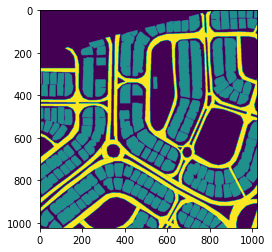

In [73]:
plt.imshow(img)
plt.show()

In [75]:
img.max()

255

In [79]:
ret, dst_road = cv2.threshold(img, 129, 2, cv2.THRESH_BINARY) #road label

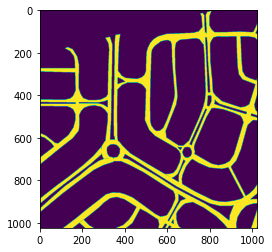

In [80]:
 plt.imshow(dst_road)
plt.show()

In [81]:
dst_road

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [82]:
dst_road.max()

2

ret, dst = cv2.threshold(img, 127, 2, cv2.THRESH_BINARY) #road label

In [83]:
img[img == 255] = 2

In [84]:
img.max()

128

In [85]:
img[img == 128] = 1

In [86]:
img.max()

2

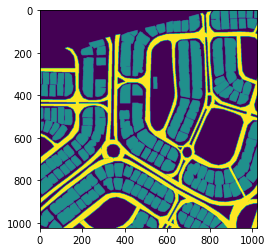

In [87]:
plt.imshow(img)
plt.show()

In [88]:
img

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [1]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [24]:
root = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/korea/LC_AP_37607046_001_FGT.png'

In [25]:
img = cv2.imread(root, cv2.IMREAD_GRAYSCALE)

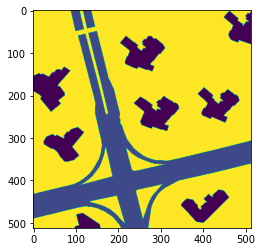

In [26]:
plt.imshow(img)
plt.show()

## label
### road : 30 -> 255
### building : 10 -> (128)
### else ->100 -> 0

In [16]:
img[img == 30] = 255
img[img == 10] = 128
img[img <128] = 0

In [17]:
img.max()

255

In [18]:
img.min()

0

In [20]:
np.median(img)

0.0

In [ ]:
cv2.imshow('go',img)

cv2.waitKey(0)

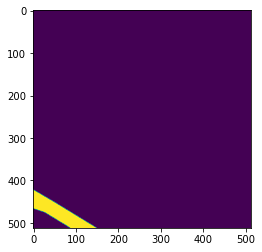

In [49]:
plt.imshow(img)
plt.show()

In [ ]:
img.max()

In [8]:
if img in 255 :
    print('true')

TypeError: argument of type 'int' is not iterable

In [25]:
if img in np.array(1):
    print('good')

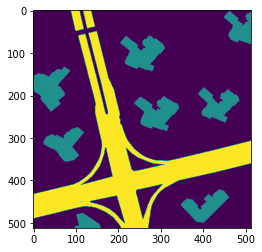

In [11]:
plt.imshow(img)
plt.show()

In [17]:
img[img == 255]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [27]:
img[img == 30] = 255
img[img == 10] = 128
img[img <128] = 0
#multi    
if img in np.array(128) and img in np.array(255):
    print('true')
            

true
